<a href="https://colab.research.google.com/github/Husted42/Husted42/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final assignment

## Task 1 - Portfolio optimization

### Task 1.a - Diversification
Choose financial stock indices (at least 7) for different markets or sectors. Time interval 20 years, monthly data. When necessary, convert all values in one domestic currency (e.g. USD).

We have chosen:

Asia:
  - iShares MSCI Japan ETF (EWJ)
  - iShares MSCI Hong Kong ETF (EWH)

America
 - IShares U.S. Financials ETF (IVF)
 - iShares Biotechnology ETF (IBB)

Europe
 - EZU
 - ^990500-EUR-STRD

Global energy
 - iShares MSCI BIC ETF (IXF)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf

import numpy as np
from scipy.optimize import minimize
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings


from sympy import symbols, Eq, solve

In [ ]:
warnings.filterwarnings("ignore", message="kurtosistest only valid for n>=20") # Ignore sm warning

In [ ]:
start = dt.datetime(2003,1,1)
end = dt.datetime(2023,12,1)

tickers = ['EWJ', 'EWH', 'IYF', 'IBB', 'IXC', 'EZU', '^990500-EUR-STRD']
price_data = yf.download(tickers, start=start, end=end, interval='1mo')
print(price_data.columns)
stocks = price_data['Close'][tickers] # Should be Adj Close, but this isn't working
stocks = stocks.dropna()

[*********************100%***********************]  7 of 7 completed

MultiIndex([( 'Close',              'EWH'),
            ( 'Close',              'EWJ'),
            ( 'Close',              'EZU'),
            ( 'Close',              'IBB'),
            ( 'Close',              'IXC'),
            ( 'Close',              'IYF'),
            ( 'Close', '^990500-EUR-STRD'),
            (  'High',              'EWH'),
            (  'High',              'EWJ'),
            (  'High',              'EZU'),
            (  'High',              'IBB'),
            (  'High',              'IXC'),
            (  'High',              'IYF'),
            (  'High', '^990500-EUR-STRD'),
            (   'Low',              'EWH'),
            (   'Low',              'EWJ'),
            (   'Low',              'EZU'),
            (   'Low',              'IBB'),
            (   'Low',              'IXC'),
            (   'Low',              'IYF'),
            (   'Low', '^990500-EUR-STRD'),
            (  'Open',              'EWH'),
            (  'Open',          

In [ ]:
stocks_prices = stocks # Used later for the backtest
print(stocks)


Ticker            EWJ        EWH        IYF         IBB        IXC        EZU  \
Date                                                                            
2003-01-01  20.021965   3.871310  22.304949   15.577431   7.682054  11.584724   
2003-02-01  20.228989   3.798851  21.662436   15.346508   7.742680  11.174154   
2003-03-01  19.105158   3.534898  21.602512   16.420927   7.777324  10.710878   
2003-04-01  18.957289   3.586653  24.201813   18.377316   7.831021  12.600055   
2003-05-01  20.081118   3.938591  25.502159   21.828274   8.582768  13.546028   
...               ...        ...        ...         ...        ...        ...   
2023-07-01  61.128551  18.715656  77.528320  128.672745  37.259796  45.346310   
2023-08-01  59.412868  16.975969  75.038742  128.075714  37.910000  43.307953   
2023-09-01  58.111641  16.040655  72.988510  121.687340  38.880604  40.805885   
2023-10-01  56.829693  15.694589  71.218170  113.261497  37.259796  39.704590   
2023-11-01  60.347820  15.72

In [ ]:
stocks = np.log((stocks / stocks.shift(1))[1:])

### Task 1.b - Estimate
Expected yearly returns and covariance matrix with a rolling window of 10 years (in annual steps)

In [ ]:
'''
  Create a dataframe contaning all the sums for each time period
  With tickers as columns and stock mean for intval as rows
'''

start_years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
end_years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Empty dataframe
df_means = pd.DataFrame(index=start_years, columns=tickers)
lst_cov = []

# Loop through years
for i in range(len(start_years)):
    print(start_years[i], end_years[i])
    tmp_stocks = stocks.loc[start_years[i]:end_years[i]]

    # Mean
    tmp_stocks_mean = tmp_stocks.mean()
    df_means.loc[start_years[i]] = tmp_stocks_mean

    # Covariance
    tmp_stocks_cov = tmp_stocks.cov()
    lst_cov.append(tmp_stocks_cov)

2003 2012
2004 2013
2005 2014
2006 2015
2007 2016
2008 2017
2009 2018
2010 2019
2011 2020
2012 2021
2013 2022


#### Print

In [ ]:
print("Mean pr ticker")
print(df_means * (12))

print("\n\nCovariance matricies")
for i in range(len(lst_cov)):
    print('\nYear : ', start_years[i], '\n', '\n', lst_cov[i] * (12), '\n', '-'*100,)

Mean pr ticker
           EWJ       EWH       IYF       IBB       IXC       EZU  \
2003  0.046631  0.123107  0.010248  0.106099  0.114116  0.075051   
2004  0.034328  0.101946  0.010908  0.116396  0.099729   0.06016   
2005  0.015569  0.083239  0.011612  0.140853  0.063943  0.030853   
2006  0.002441  0.075345  0.005525  0.149372  0.012126  0.021169   
2007 -0.000666  0.050214  0.003952  0.124572  0.018688 -0.007687   
2008   0.02754  0.046071  0.042067  0.139197 -0.001887  0.000973   
2009  0.043448  0.110326  0.102607  0.142395  0.027117  0.043124   
2010  0.057692  0.074763    0.1139  0.150706   0.01374  0.039579   
2011  0.059849   0.05675  0.101322  0.159992 -0.032642  0.049093   
2012  0.076564  0.070899  0.143246  0.149889  0.002218  0.082467   
2013  0.049193  0.037453  0.107922  0.107317  0.038527  0.042362   

     ^990500-EUR-STRD  
2003         0.035754  
2004         0.032004  
2005         0.027069  
2006         0.011889  
2007        -0.003875  
2008         0.003076  


### Task 1.c - Efficient frontier
Show in one or more figures the 11 different efficient frontiers (one for each rolling window) and explain in your report the diversification benefit.


In [ ]:
def highest_slope_portfolio(ymean, ycov, Rf):
    n = ycov.shape[0]
    Rp = ymean[0][0]

    A = np.zeros((n+1,n+1))

    A[:-1,:-1] = 2*ycov
    A[:n,-1] = -(ymean.T-Rf)
    A[-1,:n] = ymean.T-Rf
    b = np.zeros((n+1,1))
    b[-1,0] = Rp-Rf
    X = np.linalg.solve(A, b)
    X = (X[:-1]/np.sum(X[:-1])).reshape(-1,1)

    opt_var = X.T @ ycov @ X
    opt_sigma = np.sqrt(opt_var)
    opt_mu = X.T @ ymean

    return X, opt_sigma.item(), opt_mu.item()

In [ ]:
eff_frontier = {}

i = 0
for year in start_years:
  mu = df_means.iloc[i].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[i].to_numpy() * 12
  Rf = 0

  # Calcuate the higst optimal portfolio for two risk free rates
  # St. we can take all combinations later.
  X, opt_sigma, opt_mu = highest_slope_portfolio(mu, cov, Rf)
  X2, _, _ = highest_slope_portfolio(mu, cov, Rf+0.03)

  eff_frontier[year] = {
    'weights' : X,
    'sigma' : opt_sigma,
    'mu' : opt_mu,
    'weights2' : X2
  }
  i = i + 1

print(eff_frontier['2013'])

{'weights': array([[ 0.14301827],
       [ 0.12570137],
       [ 2.25112005],
       [ 0.1913462 ],
       [-0.53211857],
       [-0.90315583],
       [-0.27591147]]), 'sigma': 0.24428760672845998, 'mu': 0.2056525421420168, 'weights2': array([[-0.47496186],
       [-0.04033738],
       [ 6.4589732 ],
       [ 0.72483463],
       [-1.39544692],
       [-1.51483426],
       [-2.75822741]])}


In [ ]:
large_n = 100
mu_p = np.zeros((len(start_years), 2* large_n + 1))
std_p = np.zeros((len(start_years), 2* large_n + 1))

l = 0
# Calculate all combinations of the portfolio for each year
for j in range(len(start_years)):
  mu = df_means.iloc[l].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[l].to_numpy() * 12
  for i in range(2*large_n+1):

    curr_port = (i/large_n) * eff_frontier[start_years[j]]['weights'] + (1-i/large_n) * eff_frontier[start_years[j]]['weights2']
    mu_p[j,i] = (curr_port.T @ mu).item()
    std_p[j,i] = np.sqrt((curr_port.T @ cov @ curr_port).item())

  l += 1

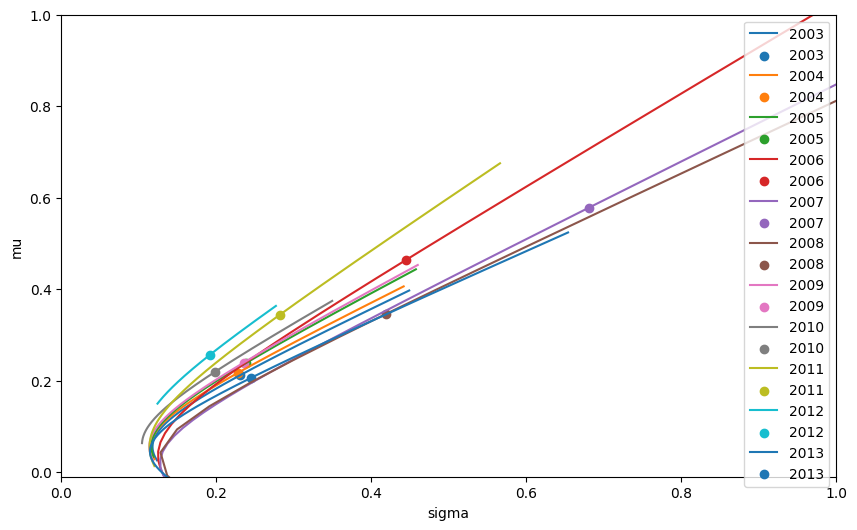

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for i in range(len(start_years)):
  ax1.plot(std_p[i,:], mu_p[i,:], label=start_years[i]) # Combinations
#   ax1.scatter(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i]) # Optimal portfolio
ax1.title.set_text('Efficient frontiers')
ax1.set(xlim=(0, 1), ylim=(-1, 1))
ax1.set_xlabel('sigma')
ax1.set_ylabel('mu')
ax1.legend()

for j in range(len(start_years)):
  ax2.plot(std_p[j,:], mu_p[j,:], label=start_years[j]) # Combinations
#   ax2.scatter(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i]) # Optimal portfolio
ax2.title.set_text('Efficient frontiers without short sales')
ax2.set(xlim=(0, 1), ylim=(0, 1))
ax2.set_xlabel('sigma')
ax2.set_ylabel('mu')
ax2.legend()

### Task 1.d - Tobin separation
Repeat the assignment c), now including a risk-free
rate of 1%. What are the consequences for the portfolio management in such a world?

In [ ]:
# Exactly the same procedure as above, now with a risk free, which means leanding and borrowing is allowed


eff_frontier = {}

i = 0
for year in start_years:
  mu = df_means.iloc[i].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[i].to_numpy() * 12
  Rf = 0.01

  # Calcuate the higst optimal portfolio for two risk free rates
  # St. we can take all combinations later.
  X, opt_sigma, opt_mu = highest_slope_portfolio(mu, cov, Rf)
  X2, opt_sigma_2, opt_mu_2 = highest_slope_portfolio(mu, cov, Rf+0.03)

  eff_frontier[year] = {
    'weights' : X,
    'sigma' : opt_sigma,
    'mu' : opt_mu,
    'weights2' : X2,
    'mu2' : opt_mu_2,
    'sigma2' : opt_sigma_2
  }
  i = i + 1



In [ ]:
large_n = 100 # 100 Combinations
mu_p = np.zeros((len(start_years), 2* large_n + 1))
std_p = np.zeros((len(start_years), 2* large_n + 1))

l = 0
for j in range(len(start_years)):
  mu = df_means.iloc[l].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[l].to_numpy() * 12
  for i in range(2*large_n+1):

    curr_port = (i/large_n) * eff_frontier[start_years[j]]['weights'] + (1-i/large_n) * eff_frontier[start_years[j]]['weights2']
    mu_p[j,i] = (curr_port.T @ mu).item()
    std_p[j,i] = np.sqrt((curr_port.T @ cov @ curr_port).item())

  l += 1

We notice that it only makes sense to look at the upper part of the

[p. 96]
 The efficient frontier is the entire length of the ray. Different points along the efficient frontier represents different amounts of borrowing and/or
 lending in combination with the optimum portfolio of risky assets. St. if lending and borrowing is allowed it would not make sense to choose another combination of the portfolio than along effecient frontier. Because along the efficient frontier you get the highest expected return for the same risk.

**[Note]** \\
If lending and borrowing is not allowed we can chosse along the combinations (Curved line). It only makes sense to invest in the top of the curves, because we in the lower half we get a lower expected return for the same risk

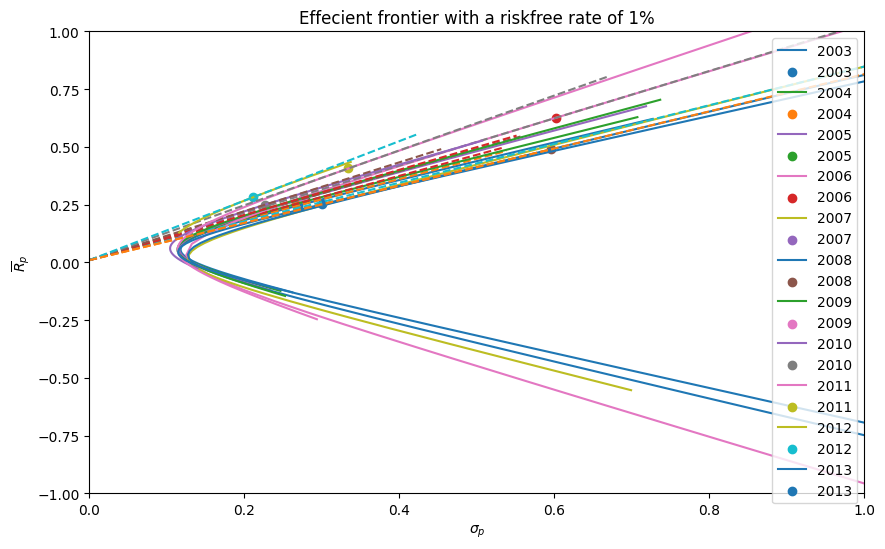

In [ ]:

fig, ax= plt.subplots(figsize=(10,6))
for i in range(len(start_years)):
  ax.plot(std_p[i,:], mu_p[i,:], label=start_years[i])
  ax.scatter(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i])
  ax.plot([0, 2*eff_frontier[start_years[i]]['sigma']], [Rf, (Rf+(eff_frontier[start_years[i]]['mu']-Rf)/eff_frontier[start_years[i]]['sigma'] * 2*eff_frontier[start_years[i]]['sigma'])], linestyle="--")

ax.set(xlim=(0, 1), ylim=(-1, 1))
ax.set_title("Effecient frontier with a riskfree rate of 1%")
ax.set_xlabel("$\sigma_p$")
ax.set_ylabel("$\overline{R}_p$")
ax.legend()
plt.show()

### Task 1.e - Asset allocation
Choose a constant required return and calculate the optimal asset allocation for the case of the Tobin separation efficient frontier in the different years. How high is the portfolio turnover on average each year?

Solve the equation : (Page 82)
$$ \hat{R}_C = (1-X)R_F + X \hat{R}_A $$

(1-X) is invested in the riskless asset \\
X is invested in the Portefolio

We only need to know the optimal portifolio on the efficient frontier. We need to figure out how much we should invest in the risk free asset, and how much we should invest in the optmial protefolio.

In [ ]:

'''
  Calcualtes the asset_allocation and adds in to the dictionary eff_frontier
'''
def asset_allocation(target_):
  # Convert to percentage
  # (We do this st. we can name the value in the efficient frontier)
  target = target_ / 100

  Rf = 0.01

  lst_return = [] # Should only contain target values
  lst_risk = [] # Contains the risk of each year

  i = 0
  for year in start_years:
    mu = eff_frontier[start_years[i]]['mu']
    sigma = eff_frontier[start_years[i]]['sigma']

    # Define a funtion in symbols and solve it
    X = symbols('X')
    equation = Eq((1 - X) * Rf + X * mu, target)
    solution = solve(equation, X)[0]

    # Put back into to original formula to validate answer
    returns = (1-solution) * Rf + solution * mu
    risks = solution * sigma

    # Save value in dictionary
    str_return = str(target_) + '_return'
    str_risk = str(target_) + '_risk'
    str_X = str(target_) + '_X'
    eff_frontier[year][str_return] = returns
    eff_frontier[year][str_risk] = risks
    eff_frontier[year][str_X] = solution

    i += 1
  return returns, risks, solution

asset_allocation(5)
asset_allocation(20)
asset_allocation(40)


(0.400000000000000, 0.484698942167639, 1.61591529616137)

Amount invested in optimal portifolio : 2003
20%  0.80
40%  1.65


Amount invested in optimal portifolio : 2013
20%  0.79
40%  1.62




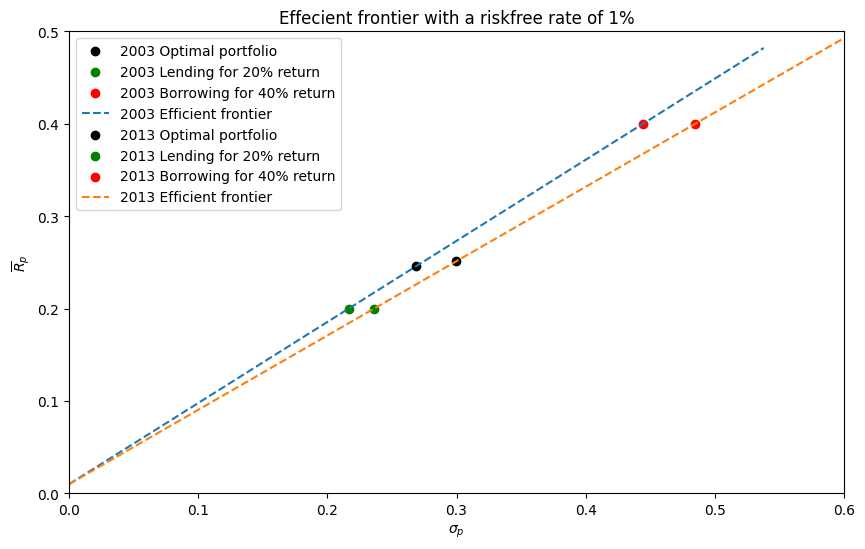

In [ ]:
'''
  Plot the results for two assets 2003 and 2013
'''

# Example with just the first and last year
fig, ax= plt.subplots(figsize=(10,6))
legends = []

for i in range(len(start_years)):
  if start_years[i] != '2003' and start_years[i] != '2013':
    continue

  ax.scatter(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i], c = 'black') # Optimal portfolio
  legends.append(str(start_years[i]) + ' Optimal portfolio')

  ax.scatter(eff_frontier[start_years[i]]['20_risk'], eff_frontier[start_years[i]]['20_return'], label=start_years[i], c = 'green') # Lending money, to earn the riskfree rate
  legends.append(str(start_years[i]) + ' Lending for 20% return')

  ax.scatter(eff_frontier[start_years[i]]['40_risk'], eff_frontier[start_years[i]]['40_return'], label=start_years[i], c = 'red') # Borrowing money at the risk free rate and buy portefolio
  legends.append(str(start_years[i]) + ' Borrowing for 40% return')

  ax.plot([0, 2*eff_frontier[start_years[i]]['sigma']], [Rf, (Rf+(eff_frontier[start_years[i]]['mu']-Rf)/eff_frontier[start_years[i]]['sigma'] * 2*eff_frontier[start_years[i]]['sigma'])], linestyle="--") # Efficient frontier
  legends.append(str(start_years[i]) + ' Efficient frontier')

  print("Amount invested in optimal portifolio : " + start_years[i])
  print('20% ', round(eff_frontier[start_years[i]]['20_X'], 2))
  print('40% ', round(eff_frontier[start_years[i]]['40_X'], 2))
  print('\n')

ax.set(xlim=(0, 0.6), ylim=(0, .5))
ax.set_title("Effecient frontier with a riskfree rate of 1%")
ax.set_xlabel("$\sigma_p$")
ax.set_ylabel("$\overline{R}_p$")
ax.legend(legends)
plt.show()

In [ ]:
print(eff_frontier['2003'])

{'weights': array([[ 0.0935255 ],
       [ 0.69583332],
       [-0.85613284],
       [ 1.16048737],
       [ 0.68102495],
       [-0.21227037],
       [-0.56246794]]), 'sigma': 0.2689132579596202, 'mu': 0.24605033413338195, 'weights2': array([[-0.38334496],
       [ 2.00468402],
       [-2.42966859],
       [ 2.82180002],
       [ 1.78426014],
       [ 0.36369226],
       [-3.1614229 ]]), 'mu2': 0.6212804794332665, 'sigma2': 0.7268359102312878, '5_return': 0.0500000000000000, '5_risk': 0.0455687993744027, '5_X': 0.169455383941112, '20_return': 0.200000000000000, '20_risk': 0.216451797028413, '20_X': 0.804913073720282, '40_return': 0.400000000000000, '40_risk': 0.444295793900426, '40_X': 1.65218999342584}


In [ ]:
'''
  Create a dataframe contaning all the sums for each time period
  With tickers as columns and stock mean for intval as rows
'''

start_years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
end_years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Empty dataframe
df_means = pd.DataFrame(index=start_years, columns=tickers)
lst_cov = []

# Loop through years
for i in range(len(start_years)):
    print(start_years[i], end_years[i])
    tmp_stocks = stocks.loc[start_years[i]:end_years[i]]

    # Mean
    tmp_stocks_mean = tmp_stocks.mean()
    df_means.loc[start_years[i]] = tmp_stocks_mean

    # Covariance
    tmp_stocks_cov = tmp_stocks.cov()
    lst_cov.append(tmp_stocks_cov)

2003 2012
2004 2013
2005 2014
2006 2015
2007 2016
2008 2017
2009 2018
2010 2019
2011 2020
2012 2021
2013 2022


In [ ]:
'''
  Turnover means "the amount of business that a company does in a period of time"
  So I guess we can just sum the change in X, in  the time period
'''
def get_weights(str_x : str):
  lst_W = []
  for i in range(len(start_years)):
    X = eff_frontier[start_years[i]]['weights']
    k = eff_frontier[start_years[i]][str_x] # Investment in the portfolio

    assert(round((X * k).sum() + (1-k), 2) == 1.00)

    W_rf = (1-k) # Amount to invest in the risk free rate
    W = np.insert(X, 0, W_rf)

    lst_W.append(W)

  return lst_W

W_20 = get_weights('20_X')

def cal_turnover(w_1 : list, w_2 : list) -> float:
  diff = w_2 - w_1

  bought = np.where(diff > 0)
  sold = np.where(diff < 0)


  sum_bought = diff[bought].sum()
  sum_sold = diff[sold].sum() * -1

  numerator = min(sum_bought, sum_sold)
  return numerator

for i in range(1, len(start_years)):
  turnover = cal_turnover(W_20[i-1], W_20[i])
  print(end_years[i], turnover)



2013 0.9209653724973347
2014 0.8100070209392568
2015 3.0869237928042823
2016 7.905303036986535
2017 8.147775769861303
2018 3.8165586950961403
2019 1.7568954954337692
2020 2.1855610783699326
2021 1.54806260360882
2022 1.561744823937559


**[Note]** \\
I makes sense that the turnover increase with the expected revenue, because the points are further apart which means we need to borrow or lend more with the risk free rate to achive the same expected return.

If we invest 0% in the portifolio we woundn't have any turnover. \\
If we invest in the portifolio and the efficient frontier get's lower, then we need to invest more in the portifolio to keep the same expected return.

### Task 1.f - Backtest
Conduct a backtest (ex-post) for the optimized portfolio (with annual re-balancing, see point e). Calculate the average return and the standard deviation for your ex-post portfolio out of sample? (i.e. your portfolio is created by calculating the mean and covariance in-sample to find your optimal portfolio, BUT then you hold your portfolio for one year out-of-sample and calculate the return you have had during this period. Then you repeat the same process again and again for each period.)


In [ ]:
# Empty dataframe
df_means_ex = pd.DataFrame(index=end_years, columns=tickers)
lst_cov = []

# Loop through years
for i in range(len(end_years)):
    if i == 0:
      continue
    tmp_stocks = stocks.loc[end_years[i]]

    # Mean
    tmp_stocks_mean = tmp_stocks.mean()

    portfolio_weights = eff_frontier[start_years[i-1]]['weights']
    portfolio_weights = [item for sublist in portfolio_weights for item in sublist] # Unpack nested list

    tmp_stocks_mean = tmp_stocks_mean * portfolio_weights # Multiply with the optimal portfolio st. we get the wieght

    df_means_ex.loc[end_years[i]] = tmp_stocks_mean * 12
    df_means_ex.loc[end_years[i], "Return"] = tmp_stocks_mean.sum() * 12
    df_means_ex.loc[end_years[i], "Expected-return"] = eff_frontier[start_years[i]]['mu']

df_means_ex = df_means_ex.dropna()
df_means_ex

print('Average return     :', df_means_ex['Return'].mean())
print('Standard deviation :', df_means_ex['Return'].std())

Average return     : 0.025059600062254862
Standard deviation : 0.4687162829360699


[-3.98077159e-02  8.03371264e+01]
[-2.36699615e-02  4.81779499e+01]


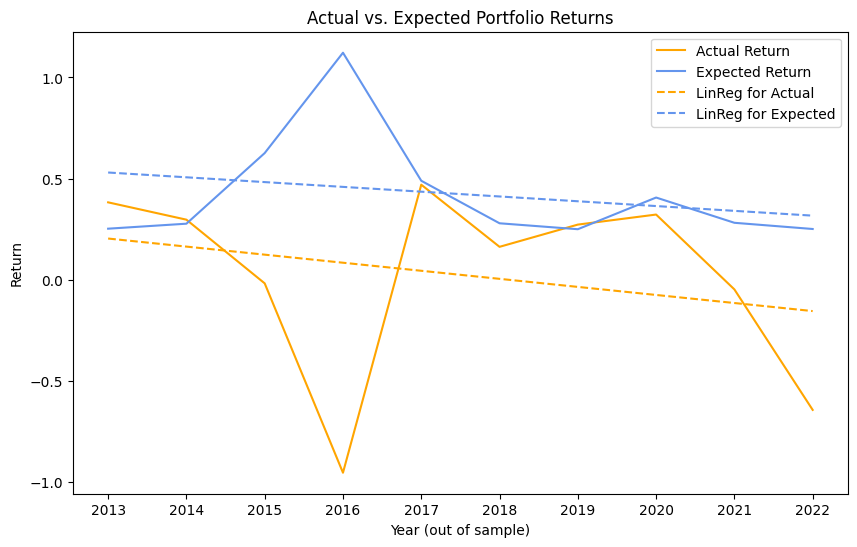

In [ ]:
end_years_int = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
return_coef = np.polyfit(end_years_int, df_means_ex['Return'], 1)
print(return_coef)
expected_coef = np.polyfit(end_years_int, df_means_ex['Expected-return'], 1)
print(expected_coef)
poly1d_fn = np.poly1d(return_coef)
poly1d_fn2 = np.poly1d(expected_coef)

plt.figure(figsize=(10, 6))
plt.plot(df_means_ex.index, df_means_ex['Return'], label='Actual Return', color='orange')
plt.plot(df_means_ex.index, df_means_ex['Expected-return'], label='Expected Return', color='cornflowerblue')
plt.plot(df_means_ex.index, poly1d_fn(end_years_int), label='LinReg for Actual', linestyle='dashed', color='orange')
plt.plot(df_means_ex.index, poly1d_fn2(end_years_int), label='LinReg for Expected', linestyle='dashed', color='cornflowerblue')
plt.xlabel('Year (out of sample)')
plt.ylabel('Return')
plt.title('Actual vs. Expected Portfolio Returns')
plt.legend()
plt.show()

### Task 1.g - Beta
Use a broad stock index to test, whether our portfolio is in line with the CAPM prediction: $\bar{R}_P = R_F + (\bar{R}_M - R_F)\beta_P$

Calculate betas for these stocks. (Use the S&P 500 as the market portfolio)

In [ ]:
# Get the s&p 500 data
price_data = yf.download(['^SP500TR'], start=start, end=end, interval='1mo')
market = price_data['Close'] # TODO: Should be 'Adj Close'

returns_market = (market / market.shift(1)).dropna()
logReturns_market = np.log(returns_market)

mean_market =  logReturns_market.mean()
var_market = logReturns_market.var()

[*********************100%***********************]  1 of 1 completed


In [ ]:
beta_dict = {}

# Lists to store returns
market_returns = []
stock_returns = []

for start, end in zip(start_years, end_years):
    # Extract portfolio weights, market log-returns, and stock returns for the period
    weights = eff_frontier[start]['weights']
    tmp_market = logReturns_market.loc[start:end]
    tmp_stocks = stocks.loc[start:end]

    # Save weighted stock returns
    stock_returns.append(tmp_stocks.mean().dot(weights))

    # Save market return
    market_returns.append(tmp_market.mean())

    # Merge and compute covariance
    tmp_data = pd.merge(tmp_stocks, tmp_market, left_index=True, right_index=True)
    covariance_matrix = tmp_data.cov()

    # Calculate betas for each ticker
    market_variance = covariance_matrix["^SP500TR"]["^SP500TR"]
    betas = [
        covariance_matrix["^SP500TR"][stock] / market_variance
        for stock in tickers
    ]

    # Calculate portfolio beta (weighted average of individual betas)
    port_beta = np.array(betas).dot(weights)
    beta_dict[end] = port_beta

pd.DataFrame(beta_dict)




,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.558533,0.51527,0.423423,0.44069,0.677867,0.651619,0.911885,0.916366,0.896264,0.864145,1.166264


In [ ]:
def calulate_average(input : dict) -> float:
  sum = 0
  for key in beta_dict:
    sum = sum + beta_dict[key]
  return sum / len(beta_dict)

print(calulate_average(beta_dict))

[0.72930254]


In [ ]:
# Portofolio return = Risk free + alpha + (Return of market - Risk free) * Beta

# Firs we need to split the data into two list x and y with elements representing each year
def alpha_list_representation(Rf : float) -> tuple[list, list]:
  """
  Returns:
      A tuple of two lists: (list of x-values, list of y-values).
  """
  lst_x = []
  lst_y = []
  # Loop through the years and get the data from all sorts of weird places :D
  for i in range(len(end_years)):
    beta = beta_dict[end_years[i]]
    market_return = market_returns[i].item() * 12
    porto_return = stock_returns[i] * 12 # Notice : We do not use the rolling window, but just a one year interval

    x = porto_return - Rf
    y = (market_return - Rf) * beta

    lst_x.append(x)
    lst_y.append(y.item())

  xs = np.array(lst_x)
  ys = np.array(lst_y)

  return xs, ys

# Fit the model using linear regression
xs, ys = alpha_list_representation(0.01)

model = sm.OLS( ys, xs , hasconst=False) # hasconst = False -> No intercept
results = model.fit()

print(
  f"alpha = {results.params} \n"
  f"We get a p-value of {results.pvalues} < 0.05, so we can reject the null hypothesis alpha = 0 \n"
  f"Also 0 is not in the confidence interval: {results.conf_int()}"
)

alpha = [0.10821893] 
We get a p-value of [0.02809117] < 0.05, so we can reject the null hypothesis alpha = 0 
Also 0 is not in the confidence interval: [[0.01424256 0.2021953 ]]


Since alpha is positive we get less money from investing in our portfolio that we would investing in a combination of the risk-free asset and the market, for the same level of systematic risk.

### Task 1.h - Timing
Calculate the Treynor-Mazuy measure and give an interpretation to these results (portfolio returns)

$$ R_{it} - R_{ft} = a_i - b_i (R_{mt}-R_{rt}) - c_i(R_{mt} - R_{ft})^2 + e_{it} $$

In [ ]:
# get market returns
market_returns_ = market_returns # Copy the market_returns so we can run the cell multiple times
market_returns_ = [item.item() for item in market_returns_]
market_returns_ = market_returns_[1:] # We do not want the first year because we use the expected revenue from the back-test
print(len(market_returns_))

# Mean values from the back-test
portfolio_returns = df_means_ex['Return'].to_list()

# portfolio_returns has already been multipled by 12
market_returns_ = [item * 12 for item in market_returns_]

# Subtract the risk free rate
market_returns_ = [item - 0.01 for item in market_returns_]
portfolio_returns = [item - 0.01 for item in portfolio_returns]

# Square market returns
market_returns_squared = [item ** 2 for item in market_returns_]


10


In [ ]:
tmp_data = []
for i in range(len(market_returns_)):
  tmp_data.append([portfolio_returns[i], market_returns_[i], market_returns_squared[i]])

timing_df = pd.DataFrame(tmp_data, columns=['portfolio', 'market', 'market_squared'])

est = smf.ols(formula='portfolio ~ market + market_squared', data=timing_df).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.238
Method:                 Least Squares   F-statistic:                    0.1363
Date:                Fri, 10 Jan 2025   Prob (F-statistic):              0.875
Time:                        09:30:09   Log-Likelihood:                -5.8940
No. Observations:                  10   AIC:                             17.79
Df Residuals:                       7   BIC:                             18.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1490      2.281     -0.

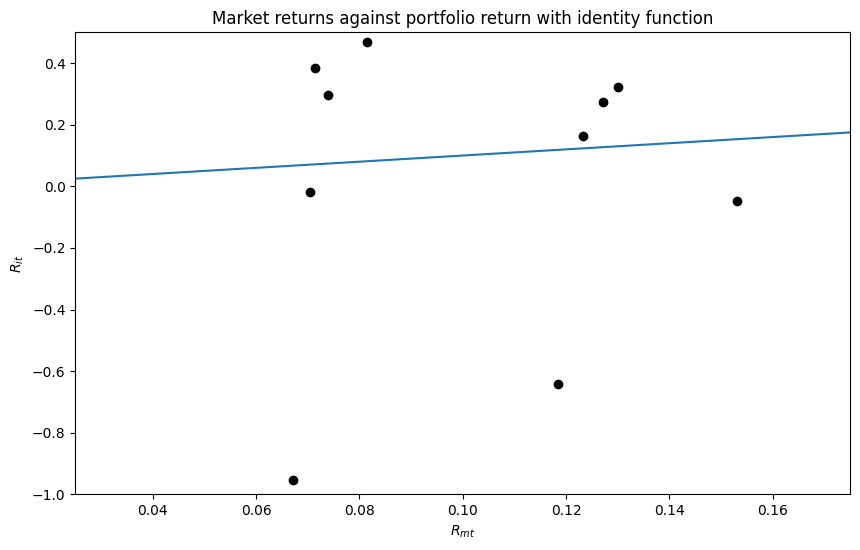

In [ ]:
# plot the maket value (X) against the expected return (y)
fig, ax= plt.subplots(figsize=(10,6))
legends = []

for i in range(len(portfolio_returns)):
  ax.scatter(market_returns_[i] + 0.01, portfolio_returns[i] + 0.01, label=start_years[i], c = 'black') # Wee add back the risk free rate
  legends.append(str(start_years[i]) + ' Optimal portfolio')
ax.plot([0, 1])

ax.set(xlim=(0.025, 0.175), ylim=(-1, .5))
ax.set_title("Market returns against portfolio return with identity function")
ax.set_xlabel("$R_{mt}$")
ax.set_ylabel("$R_{it}$")
plt.show()


In [ ]:
print(market_returns_)
print(portfolio_returns)

[0.061439633002468665, 0.06393897729876903, 0.06051829521258794, 0.05715071092474106, 0.07154952728016174, 0.11326603584414537, 0.11716039604086788, 0.12001795031706482, 0.143163689395368, 0.10833849366584451]
[0.3729552025282038, 0.2873486756778036, -0.027182598829572524, -0.9624449667209387, 0.4601710894579464, 0.15327210293630067, 0.2630444432230735, 0.31268262403461783, -0.05706210760968911, -0.6521884640751969]


## Task 2 - Bonds

### Task 2.a - Yield
Use five different "real" bonds and calculate for these bonds the yield to maturity, duration and convexity.

In [ ]:
# Germany 10 year gov bond
# UK 10 year gov bond

data = [[4, 100, 100, 10],
        [2.5, 99.28, 100, 10],
        [4.25, 95.48, 100, 10]]

info = ['coupon', 'price', 'principal amount', 'maturity']
bond_name = ['test', 'Germany', 'UK']

bonds = pd.DataFrame(data, index=bond_name, columns=info)

In [ ]:
bonds

,coupon,price,principal amount,maturity
test,4.00,100.00,100,10
Germany,2.50,99.28,100,10
UK,4.25,95.48,100,10


In [ ]:
def yield_to_maturity(df):
    y_to_m = np.zeros(len(df))
    i = 0
    for index, row in df.iterrows():
        # Define a funtion in symbols and solve it
        y = symbols('Y')
        maturity = int(row['maturity'])
        sum = np.array([row['coupon'] / (1+y)**t if t < maturity else (row['coupon'] + row['principal amount']) / (1+y)**t for t in range(1, maturity+1)])
        sum = sum.sum()
        equation = Eq(sum, row['price'])
        solutions = solve(equation, y)[:2]

        y_to_m[i] = max(solutions)
        i += 1
        print(f"Yield to maturity for {index}: {max(solutions[:2])}")

    return y_to_m

y_to_m = yield_to_maturity(bonds)
bonds['yield to maturity'] = y_to_m

Yield to maturity for test: 0.0400000000000000
Yield to maturity for Germany: 0.0258261790275433


In [ ]:
# We assume a flat yield curve
def duration(df):
    D = np.zeros(len(df))
    j = 0
    for index, row in df.iterrows():
        maturity = int(row['maturity'])
        i = df['yield to maturity']
        sum = np.array([row['coupon']*t / (1+i)**t if t < maturity else (row['coupon'])*t / (1+i)**t for t in range(1, maturity+1)])
        sum = sum.sum()
        D[j] = sum/row['price']
        print(f"Duration for {index}: {D[j]}")
        j += 1

    return D

dur = duration(bonds)
bonds['duration'] = dur

In [ ]:
def convexity(df):
    C = np.zeros(len(df))
    j = 0
    for index, row in df.iterrows():
        maturity = int(row['maturity'])
        i = df['yield to maturity']
        sum = np.array([row['coupon']*t*(t+1) / (1+i)**t if t < maturity else (row['coupon'] + row['principal amount'])*t*(t+1) / (1+i)**t for t in range(1, maturity+1)])
        sum = sum.sum()
        C[j] = (sum/row['price']) * (1/2)
        print(f"Convexity for {index}: {C[j]}")
        j += 1

    return C

convx = convexity(bonds)
bonds['convexity'] = convx

In [ ]:
bonds

### Task 2.b - Duration and convexity
Calculate the duration and convexity of a portfolio of these bonds, if EUR 100.000,- is invested in each of them

### Task 2.c - Potential decline
Estimate the potential decline in the market value of your portfolio, if the yield increases by 150 basis points.

